![Google Drive Image](https://drive.google.com/uc?export=view&id=1zLi1EkeMV8U5nADzIndtPJj041F51g0y)

<h1><center>Control 2 🐼</center></h1>

<center><strong>Introducción, Entorno de Desarrollo y Manejo de Arreglos con Numpy</strong></center>

### Cuerpo Docente:

- Profesor de Catedra: [Pablo Badilla](https://github.com/pbadillatorrealba/)
- Profesor Practico  : [Gabriel Iturra-Bocaz](https://giturra.cl/)

### Reglas:

- **Grupos de 2 personas**.
- Esta prohibido compartir las respuestas con otros grupos.
- Indicios de copia serán penalizados con la nota mínima.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente, si utiliza material extra debe citarlo.

## 1.- Carga de Datos 💻

1. Cargue el archivo [`datos.csv`](https://raw.githubusercontent.com/pbadillatorrealba/DEDCCPYAC02-recursos/master/controles/control2/datos.csv) y explore en qué consisten sus datos: cuántos datos tiene, qué tipo de datos tiene cada columna y comente de que tratan.

In [1]:
import pandas as pd
df_datos=pd.read_csv("https://raw.githubusercontent.com/pbadillatorrealba/DEDCCPYAC02-recursos/master/controles/control2/datos.csv")
df_datos.head()

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección
0,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,6.0,3,5000,440,"Calera de Tango, Queilen"
1,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,6,5000,430,"Calera de Tango, Queilen"
2,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027,140,"Calera de Tango, Avenida calera de tango con..."
3,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,6.0,No,5000,480,"Calera de Tango, Paradero 14 1/2/5 kilometros ..."
4,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,3,5000,196,"Calera de Tango, Condominio El Trébol de Caler..."


In [2]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1139 entries, 0 to 1138
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      1139 non-null   object 
 1   tipo_vivienda             1139 non-null   object 
 2   n_habitaciones            1131 non-null   float64
 3   n_baños                   1118 non-null   float64
 4   n_estacionamientos        1067 non-null   object 
 5   total_superficie_m2       1102 non-null   object 
 6   superficie_construida_m2  1103 non-null   object 
 7   dirección                 1102 non-null   object 
dtypes: float64(2), object(6)
memory usage: 71.3+ KB


In [3]:
df_datos.shape

(1139, 8)

```
El archivo tiene los datos de 1139 viviendas, donde cada una de ellas tiene información sobre 8 atributos (8 columnas).
- link: son datos tipo str y contiene la información del link donde está el anuncio de la venta la vivienda
- tipo_vivienda: son datos tipo str y corresponde a si la vivienda por ejemplo es una Casa o Departamento,
pero en este caso son todas Casas
- n_habitaciones: son datos tipo float y corresponde al número de habitaciones de la vivienda
- n_baños: son datos tipo float y corresponde al número de baños de la vivienda
- n_estacionamientos: son datos tipo srt y corresponde al número estacionamientos. Es de tipo str pues muchas viviendas no tienen estacionamiento y está indicado con la palabra No.
- total_superficie_m2: son datos tipo str y corresponde a la superficie del terreno
- superficie_construida_m2: son datos tipo str y corresponde a la superficie de la vivienda construida
- dirección: son datos tipo str y es la dirección de la vivienda.
```

2. Carge ahora el archivo [`precios.json`](https://raw.githubusercontent.com/pbadillatorrealba/DEDCCPYAC02-recursos/master/controles/control2/precios.csv). Al igual que el caso anterior, verifique la cantidad de datos, los tipos de cada columna y comente acerca de que trata. ¿Qué implica que este dataset contenga menos información que el anterior?

In [4]:
df_precios=pd.read_json("https://raw.githubusercontent.com/pbadillatorrealba/DEDCCPYAC02-recursos/master/controles/control2/precios.json")
df_precios.head()

,link,valor_uf,valor_clp,quién_vende,corredor
0,https://chilepropiedades.cl/ver-publicacion/ve...,2.778,80000000,Propiedades Centro Santiago SPA,Propiedades Centro Santiago SPA
1,https://chilepropiedades.cl/ver-publicacion/ve...,5.902,170000000,Propiedades Centro Santiago SPA,Propiedades Centro Santiago SPA
2,https://chilepropiedades.cl/ver-publicacion/ve...,6.490,186912000,Italo Manriquez Bergmann,Vende Dueño/a
3,https://chilepropiedades.cl/ver-publicacion/ve...,25.000,720000000,Francisco Vial Propiedades,Francisco Vial Propiedades
4,https://chilepropiedades.cl/ver-publicacion/ve...,5.729,165000000,Novavista,Vivirpropiedades.cl


In [5]:
df_precios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 950 entries, 0 to 949
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   link         950 non-null    object 
 1   valor_uf     950 non-null    float64
 2   valor_clp    950 non-null    int64  
 3   quién_vende  950 non-null    object 
 4   corredor     950 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 44.5+ KB


```
Este dataframe tiene información de 950 viviendas, donde tenemos 5 columnas:
- link: datos de tipo str que corresponde al link del anuncio de venta de la vivienda.
- valor_uf: datos de tipo float, corresponde al precio de venta en UF
- valor_clp: datos de tipo int, corresponde al precio de venta en pesos chilenos
- quién_vende: datos de tipo str, indica el nombre del vendedor
- corredor: datos de tipo str, corresponde al corredor o dueño

Que sean menos datos que en dataframe anterior (950/1139) nos indica que no se conoce el precio de venta ni
información de quien vende para alrededor de 189 casas, o quizás ya fueron vendidas y la información
del precio ya fue borrada de alguna base de datos.

```

3. ¿Cómo se podrían unir las dos fuentes de datos? ¿A través de una concatenación o de un merge? ¿Si es una concatenación, sobre las filas o sobre las columnas? ¿Si es un merge, de cuál tipo, sobre cuál columna y por qué?

```
Es necesario identificar los elementos que tienen en común ambos dataframes, es decir, a qué viviendas corresponden.
Una forma de hacerlo podrías ser a través del link de publicación.
Para ello, habría que usar un merge asociado a la columna link.
Si el objetivo es analizar los precios de venta, usaría un merge inner, y descartaría las viviendas que no tienen precio asociado.
```

4. Una las dos fuentes de datos en un dataframe unificado.

In [6]:
df=pd.merge(left=df_datos,
         right=df_precios,
         on="link",
         how="inner",
         sort=True)
df.head()

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
0,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027,140,"Calera de Tango, Avenida calera de tango con...",10.300,296640000,Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
1,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,300,50,"Calera de Tango, Calera de Tango",2.848,82022400,Maria Gabriela Saavedra,V & S Asesorias & Gestion Inmobiliaria
2,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,No,5000,650,"Calera de Tango, Camino loreto/condominio sant...",14.450,416160000,Pro Partners Propiedades,Pro Partners Propiedades
3,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,7.0,5.0,No,5000,300,"Calera de Tango, Condominio la virgen/frente a...",15.000,432000000,RED Gestión Propiedades,Red Gestión Propiedades
4,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,4,2600,140,"Calera de Tango, Graciela Letelier de Ibañez N...",9.850,283680000,María Teresa Olea González,Vende Dueño/a


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      950 non-null    object 
 1   tipo_vivienda             950 non-null    object 
 2   n_habitaciones            944 non-null    float64
 3   n_baños                   933 non-null    float64
 4   n_estacionamientos        891 non-null    object 
 5   total_superficie_m2       920 non-null    object 
 6   superficie_construida_m2  919 non-null    object 
 7   dirección                 916 non-null    object 
 8   valor_uf                  950 non-null    float64
 9   valor_clp                 950 non-null    int64  
 10  quién_vende               950 non-null    object 
 11  corredor                  950 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 89.2+ KB


5. Gráfique los nulos que se tienen por columna utilizando `msno.matrix`. Comente lo que vea y postule que se debería hacer con estos casos.

In [8]:
#!pip install -U missingno
import missingno as msno

In [9]:
df.isnull().sum()

link                         0
tipo_vivienda                0
n_habitaciones               6
n_baños                     17
n_estacionamientos          59
total_superficie_m2         30
superficie_construida_m2    31
dirección                   34
valor_uf                     0
valor_clp                    0
quién_vende                  0
corredor                     0
dtype: int64

<Axes: >

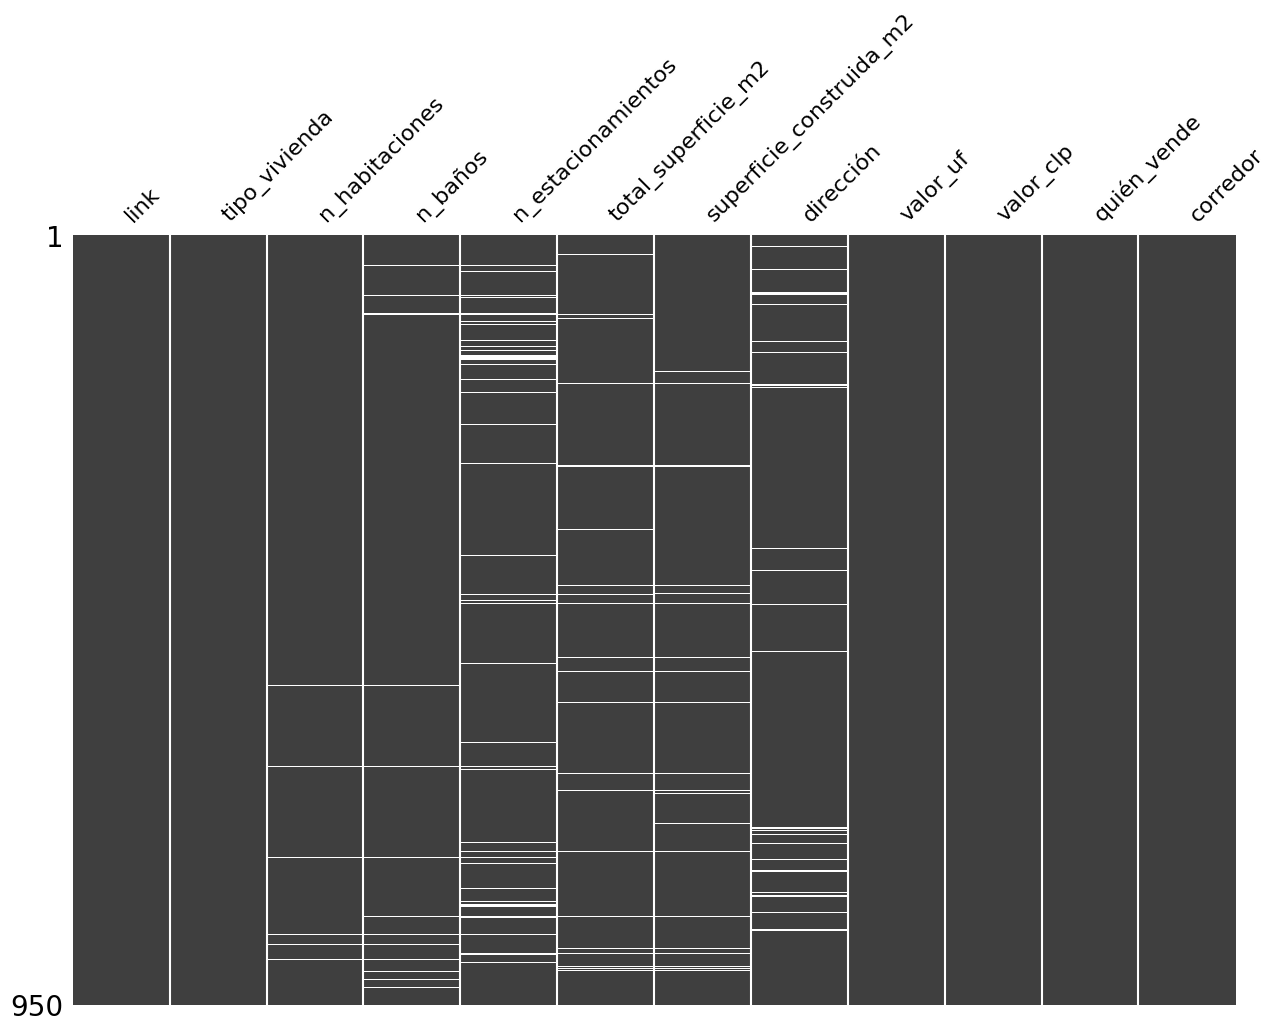

In [10]:
import matplotlib.pyplot as plt
import missingno as msno

fig, ax = plt.subplots(figsize=[15, 10])

msno.matrix(df, ax=ax, sparkline=False)

```
Hay valores nulos en n_habitaciones, n_baños, n_estacionamientos, superficie total, superficie contruida, dirección.
No es posible que una vivienda no tenga habitaciones ni baños, por lo que directamente eliminaría esos valores.
En cuanto a los estacionamientos, consideraría que si son nulos, probablemente es porque no tienen,
por lo tanto reemplazaría esos valores por 0.
En cuanto al total de superficie y superficie construida, también los eliminaría,
considerando que solo corresponden a alrededor de un 3% de los datos.
En cuanto a la dirección, como es una variable categórica, inicialmente mantendría los datos nulos
(pero viendo que más adelante se pide un análisis por comuna, también los eliminaré).
```

6. En base a lo visualizado y comentado en el punto anterior, elimine los datos nulos del conjunto de datos.

In [11]:
mascara=(~df["n_habitaciones"].isnull() & ~df["n_baños"].isnull() & ~df["total_superficie_m2"].isnull() & ~df["superficie_construida_m2"].isnull()& ~df["dirección"].isnull())
df.loc[mascara].info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 0 to 949
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      863 non-null    object 
 1   tipo_vivienda             863 non-null    object 
 2   n_habitaciones            863 non-null    float64
 3   n_baños                   863 non-null    float64
 4   n_estacionamientos        820 non-null    object 
 5   total_superficie_m2       863 non-null    object 
 6   superficie_construida_m2  863 non-null    object 
 7   dirección                 863 non-null    object 
 8   valor_uf                  863 non-null    float64
 9   valor_clp                 863 non-null    int64  
 10  quién_vende               863 non-null    object 
 11  corredor                  863 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 87.6+ KB


In [12]:
df_nuevo=df.loc[mascara]
df_nuevo.head()

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
0,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,No,2027,140,"Calera de Tango, Avenida calera de tango con...",10.300,296640000,Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
1,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,300,50,"Calera de Tango, Calera de Tango",2.848,82022400,Maria Gabriela Saavedra,V & S Asesorias & Gestion Inmobiliaria
2,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,No,5000,650,"Calera de Tango, Camino loreto/condominio sant...",14.450,416160000,Pro Partners Propiedades,Pro Partners Propiedades
3,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,7.0,5.0,No,5000,300,"Calera de Tango, Condominio la virgen/frente a...",15.000,432000000,RED Gestión Propiedades,Red Gestión Propiedades
4,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,4,2600,140,"Calera de Tango, Graciela Letelier de Ibañez N...",9.850,283680000,María Teresa Olea González,Vende Dueño/a


7. Sobre la variable `n_estacionamientos`, cuente la cantidad de valores iguales al string `No` y reemplace estos valores por el número 0.

In [13]:
df_nuevo.loc[df_nuevo["n_estacionamientos"]=="No"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 487 entries, 0 to 949
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      487 non-null    object 
 1   tipo_vivienda             487 non-null    object 
 2   n_habitaciones            487 non-null    float64
 3   n_baños                   487 non-null    float64
 4   n_estacionamientos        487 non-null    object 
 5   total_superficie_m2       487 non-null    object 
 6   superficie_construida_m2  487 non-null    object 
 7   dirección                 487 non-null    object 
 8   valor_uf                  487 non-null    float64
 9   valor_clp                 487 non-null    int64  
 10  quién_vende               487 non-null    object 
 11  corredor                  487 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 49.5+ KB



La cantidad de valores es 487.


In [14]:
#reemplazamos por 0
df_nuevo.loc[ df_nuevo["n_estacionamientos"] == "No", "n_estacionamientos"] =0
df_nuevo=df_nuevo.reset_index(drop=True)
df_nuevo.head()


,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
0,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,3.0,0,2027,140,"Calera de Tango, Avenida calera de tango con...",10.300,296640000,Alonso Baeza Rivera y Cía. Ltda. (Kennedy),Alonso Baeza Rivera y Cía. Ltda. (Kennedy)
1,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,300,50,"Calera de Tango, Calera de Tango",2.848,82022400,Maria Gabriela Saavedra,V & S Asesorias & Gestion Inmobiliaria
2,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,0,5000,650,"Calera de Tango, Camino loreto/condominio sant...",14.450,416160000,Pro Partners Propiedades,Pro Partners Propiedades
3,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,7.0,5.0,0,5000,300,"Calera de Tango, Condominio la virgen/frente a...",15.000,432000000,RED Gestión Propiedades,Red Gestión Propiedades
4,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,4,2600,140,"Calera de Tango, Graciela Letelier de Ibañez N...",9.850,283680000,María Teresa Olea González,Vende Dueño/a


In [15]:
#como mencioné más arriba, reemplazaré los nulos por 0
df_nuevo.loc[df_nuevo["n_estacionamientos"].isnull(), "n_estacionamientos"] =0
df_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      863 non-null    object 
 1   tipo_vivienda             863 non-null    object 
 2   n_habitaciones            863 non-null    float64
 3   n_baños                   863 non-null    float64
 4   n_estacionamientos        863 non-null    object 
 5   total_superficie_m2       863 non-null    object 
 6   superficie_construida_m2  863 non-null    object 
 7   dirección                 863 non-null    object 
 8   valor_uf                  863 non-null    float64
 9   valor_clp                 863 non-null    int64  
 10  quién_vende               863 non-null    object 
 11  corredor                  863 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 81.0+ KB


8. Ahora explore duplicados. Eliminarlos en caso que existan.

In [16]:
#la siguiente operación pareciera indicar que no existen duplicados, pero exploraré un poco más
df_nuevo.nunique()

link                        863
tipo_vivienda                 1
n_habitaciones               13
n_baños                      10
n_estacionamientos            9
total_superficie_m2         394
superficie_construida_m2    258
dirección                   834
valor_uf                    475
valor_clp                   465
quién_vende                 255
corredor                    118
dtype: int64

In [17]:
#podrían existir distintos anuncios para la misma casa, donde los precios sean distintos, o quién vende (distinto corredor)
#buscaré las casas que tengan las mismas características
m1=(df_nuevo.loc[:,["n_habitaciones", "n_baños","total_superficie_m2","superficie_construida_m2"]]).duplicated(keep=False)

In [18]:
#efectivamente hay duplicados
df_nuevo.loc[m1].sort_values(by="superficie_construida_m2").head(6)

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
617,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,0,0,"Puente Alto, Acceso Parque San Francisco",3.367,97000000,Jennifer reygada,Vende Dueño/a
427,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,0,0,0,"Maipú, villa hernan diaz arrieta, rene olivare...",2.083,60000000,Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria
134,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,0,100,100,"Independencia, Sevilla 1211",2.778,80000000,Eduardo GZ,Vende Dueño/a
182,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,3,100,100,"La Granja, Cunlahua",2.604,75000000,Alessandro Matteucci Cajas,Alessandro Matteucci Cajas
564,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,0,272,116,"Providencia, Los Españoles/El Cerro",14.000,403200000,Claudia Lespinasse,Norbert Lui Propiedades
565,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,0,272,116,"Providencia, Los Españoles/El Cerro",13.500,388800000,Claudia Lespinasse,Norbert Lui Propiedades


In [19]:
#muchos precios se repiten así que consideraré ese atributo como requisito adicional para eliminar los primeros repetidos
m2=(df_nuevo.loc[:,["n_habitaciones", "n_baños","total_superficie_m2","superficie_construida_m2", "valor_uf"]]).duplicated(keep=False)
df_nuevo.loc[m2].sort_values(by="superficie_construida_m2").head(6)

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
577,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,7.0,1.0,0,0,125,"Providencia, Salvador Donoso, en Zona Tipica d...",6.500,187200000,Miguel León,Vende Dueño/a
576,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,7.0,1.0,0,0,125,"Providencia, Salvador Donoso, en Zona Tipica d...",6.500,187200000,Verónica Aldunate,Vende Dueño/a
405,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,2,240,127,"Maipú, Camino a Melipilla",4.861,140000000,MARCO ANTONIO MORELLI RODRIGUEZ,Marco Morelli
404,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,2,240,127,"Maipú, Camino a Melipilla",4.861,140000000,MARCO ANTONIO MORELLI RODRIGUEZ,Marco Morelli
361,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,2.0,3,180,160,"Lo Prado, Los Sauces 889",4.337,124900000,Corredores Asociados,Corredores Asociados
362,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,2.0,3,180,160,"Lo Prado, Los sauces",4.337,124900000,Corredores Asociados,Corredores Asociados


In [20]:
#elminaré las filas repetidas, conservando los datos de la primera aparición de la vivienda
m2=~(df_nuevo.loc[:,["n_habitaciones", "n_baños","total_superficie_m2","superficie_construida_m2", "valor_uf"]]).duplicated(keep="first")
df_nuevof=df_nuevo.loc[m2].sort_values(by="superficie_construida_m2")
df_nuevof

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
338,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,0,0,0,"Lo Barnechea, El Rodeo/ Huinganal",14.500,417600000,Vivaqui Propiedades,Vivaqui Propiedades
427,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,0,0,0,"Maipú, villa hernan diaz arrieta, rene olivare...",2.083,60000000,Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria
127,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,3.0,0,298,0,"Independencia, Guanaco/Cotapos",7.638,220000000,RED Gestión Propiedades,Red Gestión Propiedades
331,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,5.0,0,0,0,"Lo Barnechea, Colegio Huinganal",21.500,619200000,Vivaqui Propiedades,Vivaqui Propiedades
617,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,0,0,"Puente Alto, Acceso Parque San Francisco",3.367,97000000,Jennifer reygada,Vende Dueño/a
...,...,...,...,...,...,...,...,...,...,...,...,...
454,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,0,98,98,"Ñuñoa, los aliagas/diagonal oriente tf",5.659,163000000,Cristian Vial Propiedades,Cristian Vial Propiedades
360,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,1.0,1,164,99,"Lo Prado, Dr Diego Aracena 5882 (I. Decepción/...",2.708,78000000,Marisol Fuentealba C.,Vende Dueño/a
155,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,2.0,2,160,99,"La Cisterna, Sta Corina 567",4.514,130000000,Marco Antonio Matamala Carrasco,Vende Dueño/a
388,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,0,130,99,"Macul, Pedro Valdivia/Los Espinos",3.993,115000000,Propiedades Centro Santiago SPA,Propiedades Centro Santiago SPA


In [21]:
#Se redujo la cantidad de datos desde 863 a 854

In [22]:
#Explorando un poco más, vemos que hay dos casas repetidas donde la superficie construida es ligeramente distinta
#las casas 835-836 y 363-364 56-39
m3=(df_nuevof.loc[:,["n_habitaciones", "n_baños","n_estacionamientos","total_superficie_m2","valor_uf"]]).duplicated(keep=False)
df_nuevof.loc[m3].sort_values(by="valor_uf")

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
363,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,1,162,78,"Lo Prado, Marga Marga 113",2.951,85000000,Angélica Escanilla,Vende Dueño/a
364,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,1,162,90,"Lo Prado, Marga Marga",2.951,85000000,Angélica Escanilla,Vende Dueño/a
836,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,0,280,180,"Vitacura, Colegio Aleman-Geronimo de Alderete",15.500,446400000,Cata Brochet Propiedades,Cata Brochet Propiedades
835,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,4.0,0,280,187,"Vitacura, Colegio aleman-geronimo de alderete",15.500,446400000,Cata Brochet Propiedades,Cata Brochet Propiedades


In [23]:
#Explorando un poco más, vemos que hay una casa repetidas donde la superficie total es distinta
#las casas 56-39
m4=(df_nuevof.loc[:,["n_habitaciones", "n_baños","n_estacionamientos","superficie_construida_m2","valor_uf"]]).duplicated(keep=False)
df_nuevof.loc[m4].sort_values(by="valor_uf")

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor
723,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,0,200,120,"Renca, Pje Seis 4737",2.951,85000000,Gustavo Adolfo Hugo Palma Fuentes,Vende Dueño/a
359,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,4.0,2.0,0,283,120,"Lo Prado, Casa de 1 Piso cercano a Estaciòn me...",2.951,85000000,Corretajes Prosal Ltda.,Corretajes Prosal
56,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,0,20,560,"Colina, Santa María De Chamisero I/Santa María...",34.900,1005120000,Jorge Pablo Caro Propiedades,Jorge Pablo Caro Propiedades
39,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,6.0,6.0,0,20000,560,"Colina, Colina",34.900,1005120000,Marianella Vergara,Vende Dueño/a


In [24]:
#como son pocos datos los eliminaré "a mano", usando los índices
df_nuevof=df_nuevof.drop([56,364,836])
df_nuevof.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851 entries, 338 to 470
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   link                      851 non-null    object 
 1   tipo_vivienda             851 non-null    object 
 2   n_habitaciones            851 non-null    float64
 3   n_baños                   851 non-null    float64
 4   n_estacionamientos        851 non-null    object 
 5   total_superficie_m2       851 non-null    object 
 6   superficie_construida_m2  851 non-null    object 
 7   dirección                 851 non-null    object 
 8   valor_uf                  851 non-null    float64
 9   valor_clp                 851 non-null    int64  
 10  quién_vende               851 non-null    object 
 11  corredor                  851 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 86.4+ KB


9. Generar la columna `cuantil_uf` que divida por quintiles (q=5) el precio de las casas. Etiquete los quintiles generados con las siguientes etiquetas: ['Bajo', 'Típico', 'Típico-Alto', 'Alto', 'Muy Alto']. Luego, agregarla en el dataframe.

In [25]:
df_nuevof["cuantil_uf"]=pd.qcut(df_nuevof["valor_uf"],q=5,labels = ["Bajo", "Típico", "Típico-Alto", "Alto", "Muy Alto"])
df_nuevof.head()

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor,cuantil_uf
338,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,0,0,0,"Lo Barnechea, El Rodeo/ Huinganal",14.500,417600000,Vivaqui Propiedades,Vivaqui Propiedades,Alto
427,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,0,0,0,"Maipú, villa hernan diaz arrieta, rene olivare...",2.083,60000000,Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria,Bajo
127,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,3.0,0,298,0,"Independencia, Guanaco/Cotapos",7.638,220000000,RED Gestión Propiedades,Red Gestión Propiedades,Típico-Alto
331,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,5.0,0,0,0,"Lo Barnechea, Colegio Huinganal",21.500,619200000,Vivaqui Propiedades,Vivaqui Propiedades,Muy Alto
617,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,0,0,"Puente Alto, Acceso Parque San Francisco",3.367,97000000,Jennifer reygada,Vende Dueño/a,Típico


10. Extraer comuna desde dirección y guardarla como una nueva columna. Para esto, seleccione la serie direcciones, convierta la serie a string (`.astype(str)`), ejecute un `split` usando como separador una coma, seleccione el primer string del arreglo generado usando un `apply` (hint: `lambda x: x[0]`) y luego elimine los espacios sobrantes usando `strip`. Por último, guarde la serie producida en la columna `comuna` en el dataframe.

In [26]:
nueva_columna=df_nuevof["dirección"].astype(str).str.split(",").apply(lambda x: x[0]).str.strip()
df_nuevof["Comuna"]=nueva_columna
df_nuevof.head(5)

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor,cuantil_uf,Comuna
338,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,3.0,0,0,0,"Lo Barnechea, El Rodeo/ Huinganal",14.500,417600000,Vivaqui Propiedades,Vivaqui Propiedades,Alto,Lo Barnechea
427,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,0,0,0,"Maipú, villa hernan diaz arrieta, rene olivare...",2.083,60000000,Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria,Bajo,Maipú
127,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8.0,3.0,0,298,0,"Independencia, Guanaco/Cotapos",7.638,220000000,RED Gestión Propiedades,Red Gestión Propiedades,Típico-Alto,Independencia
331,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5.0,5.0,0,0,0,"Lo Barnechea, Colegio Huinganal",21.500,619200000,Vivaqui Propiedades,Vivaqui Propiedades,Muy Alto,Lo Barnechea
617,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3.0,1.0,2,0,0,"Puente Alto, Acceso Parque San Francisco",3.367,97000000,Jennifer reygada,Vende Dueño/a,Típico,Puente Alto


11. En base a los contenidos visualizados para cada una de las columnas, convierta las variables a los tipos `string`, `int` y `float` de acuerdo con el contenido que posee cada columna. Justifique la elección de cada tipo para cada una de las variables.

In [27]:
df_nuevof["total_superficie_m2"]=df_nuevof["total_superficie_m2"].str.replace(",", ".")
df_nuevof["valor_uf"]=df_nuevof["valor_uf"]*1000
df_nuevof["superficie_construida_m2"]=df_nuevof["superficie_construida_m2"].str.replace(",", ".")

In [28]:
df_nuevof=df_nuevof.astype({'n_habitaciones': 'int', "n_baños":'int', "n_estacionamientos": "int",
                            "valor_uf": "int", "superficie_construida_m2": "float", "total_superficie_m2": "float"})
df_nuevof.head(5)

,link,tipo_vivienda,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,dirección,valor_uf,valor_clp,quién_vende,corredor,cuantil_uf,Comuna
338,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5,3,0,0.0,0.0,"Lo Barnechea, El Rodeo/ Huinganal",14500,417600000,Vivaqui Propiedades,Vivaqui Propiedades,Alto,Lo Barnechea
427,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3,1,0,0.0,0.0,"Maipú, villa hernan diaz arrieta, rene olivare...",2083,60000000,Vip Gestión inmobiliaria,Vip Gestion Inmobiliaria,Bajo,Maipú
127,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,8,3,0,298.0,0.0,"Independencia, Guanaco/Cotapos",7638,220000000,RED Gestión Propiedades,Red Gestión Propiedades,Típico-Alto,Independencia
331,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,5,5,0,0.0,0.0,"Lo Barnechea, Colegio Huinganal",21500,619200000,Vivaqui Propiedades,Vivaqui Propiedades,Muy Alto,Lo Barnechea
617,https://chilepropiedades.cl/ver-publicacion/ve...,Casa,3,1,2,0.0,0.0,"Puente Alto, Acceso Parque San Francisco",3367,97000000,Jennifer reygada,Vende Dueño/a,Típico,Puente Alto


In [29]:
df_nuevof.dtypes

link                          object
tipo_vivienda                 object
n_habitaciones                 int64
n_baños                        int64
n_estacionamientos             int64
total_superficie_m2          float64
superficie_construida_m2     float64
dirección                     object
valor_uf                       int64
valor_clp                      int64
quién_vende                   object
corredor                      object
cuantil_uf                  category
Comuna                        object
dtype: object

```
Los baños, habitaciones, estacionamientos, valor en CLP y valor en UF son valores enteros.
No hay información de baño de visita, por lo que asumí que se cuenta como número entero. En cuanto al precio,
diría que es típico que sea entero, aunque el cambio de la UF sea decimal se aproxima al entero más cercano.
Las superficies son float, ya que pueden haber valores como 70.5 metros cuadrados, es usual incluir esos decimales.
El resto son strings (tipo_vivienda, dirección, quién vende, corredor, comuna), pues corresponden a información con palabras,
no números. En cuando al cuantil corresponde a category.
```

## 2.-Análisis Univariado 👀

1.- Verifique los datos que componen las variables `total_superficie_m2`, `superficie_construida_m2` y `valor_uf` utlizando histogramas. Si observa irregularidades en los datos señale el problema y realice una limpieza de estas irregularidades. Finalmente, comente las distribuciones observadas.

In [30]:
import plotly.express as px
px.histogram(
    df_nuevof,
    x="total_superficie_m2",
    title="Análisis de la variable total_superficie_m2",
    marginal="box"
)

Exploraré si algunas casas tienen un valor nulo en la superficie total, ya que aparecen muchas casas dentro del rango inicial.

In [31]:
df_nuevof['total_superficie_m2'].sort_values().head(15)

338    0.0
59     0.0
576    0.0
757    0.0
429    0.0
152    0.0
520    0.0
381    0.0
254    0.0
446    0.0
128    0.0
261    0.0
684    0.0
617    0.0
163    0.0
Name: total_superficie_m2, dtype: float64

Efectivamente hay casas con un valor nulo para su superficie, lo cual no tiene sentido, por esa razón los eliminaré. Pues si quisiéramos analizar si existe alguna relación entre el precio y este atributo, tendríamos información errónea.

In [32]:
m5=df_nuevof['total_superficie_m2']==0
df_nuevof=df_nuevof.loc[~m5]

In [33]:
px.histogram(
    df_nuevof,
    x="superficie_construida_m2",
    title="Análisis de la variable superficie_construida_m2",
    marginal="box"
)

In [34]:
df_nuevof['superficie_construida_m2'].sort_values().head(15)

127     0.0
192     0.0
274     0.0
75      0.0
519     0.0
203     1.0
754    40.0
794    40.0
87     40.0
200    42.0
458    44.0
397    45.0
673    46.0
50     46.0
473    47.0
Name: superficie_construida_m2, dtype: float64

Con el mismo argumento anterior, eliminaré los datos que tienen una superficie contruida nula o igual a 1.

In [35]:
m6=df_nuevof['superficie_construida_m2']==0
m7=df_nuevof['superficie_construida_m2']==1
df_nuevof=df_nuevof.loc[~m6 & ~m7]

In [36]:
px.histogram(
    df_nuevof,
    x="valor_uf",
    title="Análisis de la variable valor_uf",
    marginal="box"
)

In [37]:
df_nuevof['valor_uf'].sort_values().head(5)

71     1215
201    1215
133    1215
194    1250
754    1250
Name: valor_uf, dtype: int64

Creo que en este caso no observo ninguna irregularidad

Con los datos definitivos realizaré los histogramas finales.

In [38]:
df_nuevof.loc[:, ["total_superficie_m2"]].describe().round(2)


,total_superficie_m2
count,828.00
mean,887.71
std,1927.78
min,8.00
25%,185.00
50%,300.00
75%,600.00
max,30000.00


In [39]:
import plotly.express as px
px.histogram(
    df_nuevof,
    x="total_superficie_m2",
    title="Análisis de la variable total_superficie_m2",
    marginal="box"
)

Se observa que el 50% de las casas tienen una superficie total entre 185 y 600 m2. La mediana es 300 m2.
La mayor cantidad de casas tiene una superficie total bajo el promedio (887 m2), de esta manera, podemos decir que su skewness es positiva, es decir, la distribución está desplazada hacia la derecha con respecto a su valor central.
 Los valores outliers se encuentran para superficies sobre 1208 m2. Existen muchas en este rango, que hacen que la cola de la distribución sea muy larga hacia la derecha.

In [40]:
df_nuevof.loc[:, ["superficie_construida_m2"]].describe().round(2)


,superficie_construida_m2
count,828.00
mean,182.01
std,127.85
min,40.00
25%,100.00
50%,140.00
75%,220.75
max,1400.00


In [41]:
px.histogram(
    df_nuevof,
    x="superficie_construida_m2",
    title="Análisis de la variable superficie_construida_m2",
    marginal="box"
)

Se observa que el 50% de las casas tienen una superficie contruida entre 100 y 221.5 m2. La mediana es 140 m2.
La mayor cantidad de casas tiene una superficie contruida bajo el promedio (182 m2), de esta manera, podemos decir que su skewness es positiva, es decir, la distribución está desplazada hacia la derecha con respecto a su valor central.
Los valores outliers se encuentran para superficies sobre 400 m2. Nuevamente, existen muchas en este rango, que hacen que la cola de la distribución sea muy larga hacia la derecha.

In [42]:
df_nuevof.loc[:, ["valor_uf"]].describe().round(2)


,valor_uf
count,828.00
mean,10656.66
std,9944.72
min,1215.00
25%,3797.50
50%,7059.00
75%,13925.00
max,70828.00


In [43]:
px.histogram(
    df_nuevof,
    x="valor_uf",
    title="Análisis de la variable valor_uf",
    marginal="box"
)

Se observa que el 50% de las casas tienen valor en UF entre 3795 y 13.950. La mediana es 7059 UF. Los valores outliers se encuentran para precios sobre 29.000 UF.
La distribución es muy parecida a las dos anteriores, con un skewness positivo y una larga cola hacia la derecha, lo que podría hacer suponer que los tres atributos están directamente relacionados entre sí.

2. Elaborar un conteo de las comunas. Luego, analice los resultados. Relacione con variables no presentes en el dataset tales como el nivel de ingresos de la comuna y el tamaño de estas.

In [44]:
df_nuevof[["Comuna"]].value_counts()

Comuna             
Ñuñoa                  41
La Reina               40
Quilicura              38
Lo Barnechea           38
Las Condes             38
Pudahuel               36
Providencia            36
Vitacura               34
Peñalolén              34
Colina                 32
Puente Alto            32
Santiago               31
San Bernardo           31
Maipú                  29
Lampa                  28
Macul                  28
San Miguel             24
La Florida             22
Huechuraba             22
La Cisterna            18
Independencia          17
Recoleta               16
La Pintana             14
El Bosque              14
Padre Hurtado          13
Peñaflor               13
Cerrillos              12
San Joaquín            12
Conchalí               11
Estación Central       11
Renca                  10
La Granja              10
Calera de Tango        10
Quinta Normal           9
Pedro Aguirre Cerda     9
Lo Prado                6
Lo Espejo               4
San Ramón         

In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


fig = make_subplots(
    rows=1 , cols=1)

data = df_nuevof.loc[:, "Comuna"]
hist = go.Histogram(x=data, name="Comuna")
fig.add_trace(hist, row=1, col=1)

fig.update_layout(
    height=1200,
    title_text="Análisis Univariado de las Variable Comuna",
    showlegend=False,
)
fig.show()

```
Se puede observar que algunas de las comunas donde se venden menos casas, por ejemplo, Cerro Navia (1), El Monte (1), Lo Espejo (4),
San Ramón (2) tienen altos índices de pobreza y por ende menor ingreso. En el otro extremo, con mayores ingresos, están
Lo Barnechea (38) y Las Condes (38), por ejemplo, donde al mismo tiempo hay gran cantidad de casas en venta.
Puente Alto (32), Maipú (29), y Santiago (31) que son las comunas con mayor población también tienen hartas casas en venta.
Las que tienen menor población son Padre Hurtado (13), San Ramón (2), Cerrillos (12),
sin embargo, las que venden más casas de estas 3, Padre Hurtado y Cerrillos, tienen un ingreso superior en 200.000
si se compara con San Ramón.

 ```

3. Elabore un conteo de los corredores de propiedades. Analice los resultados. ¿Qué porcentaje vende dueño y que porcentaje vende un corredor?

In [46]:
df_nuevof["corredor"].value_counts()

corredor
Vende Dueño/a                   183
Corretajes Prosal                40
Cata Brochet Propiedades         34
Vivaqui Propiedades              33
Jorge Pablo Caro Propiedades     30
                               ... 
Gestor Propiedades                1
castillapropiedades               1
Difusion Propiedades              1
Guillermo Bravo Zarate            1
BEhouse Propiedades               1
Name: count, Length: 118, dtype: int64

In [47]:
fig = make_subplots(
    rows=1 , cols=1)

data = df_nuevof.loc[:, "corredor"]
hist = go.Histogram(x=data, name="corredor")
fig.add_trace(hist, row=1, col=1)

fig.update_layout(
    height=1200,
    title_text="Análisis Univariado de las Variable Corredor",
    showlegend=False,
)
fig.show()

In [48]:
df_nuevof.shape

(828, 14)

```
Se observa que 183 casas son vendidas por Dueño/a. Nuestro dataset tiene la información de 828 casas, por lo que el
porcentaje vendida por Dueño/a es 22%, mientras que por corredor un 78%.
Existen algunos corredores que venden hartas casas (>25), por ejemplo: Propiedades Centro Santiago SPA, Corretajes Prosal,
Cata Brochet Propiedades, Mauricio Pino Propiedades, Propiedades Ricardo Vial, Jorge Pablo Caro Propiedades, Vivaqui Propiedades.
Concentrando alrededor del 26% de las casas en venta.
```

## 3.-Análisis Multivariado 📈

1. Relacione a través de un gráfico de dispersión (scatterplot) la superficie construida con respecto al valor de la vivienda en UF. Incluya una regresión lineal por mínimos cuadrados (`trendline='ols'`).  Luego, analice los patrones descubiertos.

In [49]:
fig = px.scatter(
    df_nuevof,
    x="superficie_construida_m2",
    y="valor_uf",
    title=f"Sup Construida vs valor UF",
    trendline="ols",
)
fig.show()

```
Existe una correlación positiva entre ambas variables bien definida.
El comportamiento es lineal aunque ruidoso.
Se observan algunos outliers bien alejados de la curva predictiva, sería interesante explorarlos, y en caso de poder justificarlos,
excluirlos del análisis.
El valor de R2 es 0.59. Todo esto hace que la superficie construida sea una variable de interés.


```

2. Relacione a través de un gráfico de dispersión (scatterplot) la superficie total con respecto a la superficie construida. Incluya una regresión lineal por mínimos cuadrados (`trendline='ols'`). Luego, analice los patrones descubiertos.

In [50]:
fig = px.scatter(
    df_nuevof,
    x="superficie_construida_m2",
    y="total_superficie_m2",
    title=f"Sup Construida vs Total",
    trendline="ols",
)
fig.show()

```
Existe una correlación positiva entre ambas variables.
El R2 es menor en este caso, correspondiente a 0.18, lo que indica que el modelo no explica tan bien la información.
```

3. Ejecute un `scatter_matrix` sobre el total de superficie, superficie construida, número de habitaciones y numero de baños usando como variable de color el precio. ¿Encuentra alguna relación interesante?

In [51]:
variables_interes = ["total_superficie_m2",  'superficie_construida_m2',
    "n_habitaciones",
    "n_baños"
]
fig = px.scatter_matrix(
    df_nuevof.sort_values(by="valor_clp", ascending=True),
    dimensions=variables_interes,
    height=1200,
    title="Análisis Bivariado",
).update_traces(diagonal_visible=False)

fig.show()

```
Se observa una correlación entre el número de baños y el número de habitaciones, y el número de baños y la superficie construida.
En ambas situaciones a mayor cantidad de baños, mayor cantidad se espera de la otra variable.
```

4. Realice una agregación por comuna que contenta el número de casas en venta, el valor promedio de las casas, la superficie promedio construida y la superficie total promedio. Con la agregación obtenida, obtenga las 10 comunas con el valor promedio de hogares más altos. Analice los resultados obtenidos.

In [52]:
df_summary=df_nuevof.groupby(["Comuna"]).agg({ "Comuna": ["count"],  "valor_uf": ["mean"], "superficie_construida_m2":["mean"],"total_superficie_m2":["mean"]}).round(2)
df_summary

,Comuna,valor_uf,superficie_construida_m2,total_superficie_m2
,count,mean,mean,mean
Comuna,,,,
Calera de Tango,10,14024.80,301.40,3992.70
Cerrillos,12,4134.75,101.67,255.08
Cerro Navia,1,4861.00,120.00,560.00
Colina,32,15630.75,322.31,5300.91
Conchalí,11,4896.91,131.96,199.86
El Bosque,14,4936.50,120.07,286.86
El Monte,1,2604.00,185.00,670.00
Estación Central,11,5785.36,124.55,261.55


In [53]:
df_summary.sort_values(by=('valor_uf',  'mean'),ascending=False).head(10)

,Comuna,valor_uf,superficie_construida_m2,total_superficie_m2
,count,mean,mean,mean
Comuna,,,,
Lo Barnechea,38,27893.87,375.66,2384.76
Las Condes,38,26240.66,324.03,961.29
Vitacura,34,22936.94,262.62,1071.71
Providencia,36,17626.11,205.38,348.84
La Reina,40,17504.75,230.30,767.32
Colina,32,15630.75,322.31,5300.91
Calera de Tango,10,14024.80,301.40,3992.70
Santiago,31,12776.29,239.87,869.10


```
Las 10 comunas con el promedio más alto son: Lo Barnechea, Las Condes, Vitacura, Providencia, La Reina, Colina, Calera de Tango,
Santiago, Ñuñoa, Peñalolén.
Las primeras 5 pertenecen al sector Oriente y con más altos ingresos: Lo Barnechea, Las Condes, Vitacura, La Reina, Providencia.
Las que siguen quedan en sectores de las afueras de Santiago: Colina y Calera de Tango, lo que me hace suponer que esos terrenos deben tener una superficie grande, por lo que el precio es mayor.
En cuanto a Santiago y Ñuñoa, por su ubicación céntrica, los precios también son altos.
En resumen, los resultados son esperados.

```

5. Grafique las correlaciones entre las variables numéricas y analice los resultados obtenidos.

In [54]:
correlaciones=df_nuevof.corr(numeric_only=True).round(2)
correlaciones

,n_habitaciones,n_baños,n_estacionamientos,total_superficie_m2,superficie_construida_m2,valor_uf,valor_clp
n_habitaciones,1.00,0.58,0.04,0.14,0.49,0.34,0.34
n_baños,0.58,1.00,0.03,0.28,0.63,0.57,0.57
n_estacionamientos,0.04,0.03,1.00,0.09,-0.02,-0.13,-0.13
total_superficie_m2,0.14,0.28,0.09,1.00,0.43,0.37,0.37
superficie_construida_m2,0.49,0.63,-0.02,0.43,1.00,0.77,0.77
valor_uf,0.34,0.57,-0.13,0.37,0.77,1.00,1.00
valor_clp,0.34,0.57,-0.13,0.37,0.77,1.00,1.00


In [55]:
px.imshow(
correlaciones,
aspect="16:9",
title="Correlación entre Variables",
height=800,
zmin=-1,
color_continuous_midpoint=0,
zmax=1,
color_continuous_scale=px.colors.sequential.Viridis,)

```
Hay una correlación alta entre:
- la superficie construida y el valor (0.77).
- el número de baños y la superficie construida (0.63).

Hay una correlación moderada entre:
- el número de baños y el número de habitaciones (0.58).
- el número de baños y el valor (0.57).
- el número de habitaciones y la superficie construida (0.49).
- la superficie total y la superficie construida (0.43).

El resto son correlaciones bajas o nulas.
En cuanto al número de estacionamientos, muestra una correlación negativa con algunos atributos, me hace pensar que es probable que los valores nulos iniciales en esta variable no necesariamente significaba 0 estacionamientos.
```



6. Verifique si los corredores del tipo `Vende Dueño/a` venden las casas a precios más bajos (en promedio) que el resto de los corredores (corredores profesionales). Analice sus resultados obtenidos.

In [56]:
vende_corredor=df_nuevof.loc[~(df_nuevof["corredor"]=="Vende Dueño/a")]
vende_corredor["valor_uf"].mean().round(0)

11683.0

In [57]:
vende_dueño=df_nuevof.loc[(df_nuevof["corredor"]=="Vende Dueño/a")]
vende_dueño["valor_uf"].mean().round(0)

7040.0

```
Efectivamente, los "Vende Dueño/a" venden en promedio a un precio más bajo, 7.040 UF versus 11.683 UF que corresponde al resto de los corredores. Me parece esperado pues los corredores cobran comisión, lo que en promedio sube el precio de venta. Otra razón que se me ocurre es que los corredores tienen más experiencia, por lo que pueden obtener un mejor precio, pues conocen más el comercio.```

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>